In [39]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
plt.style.use('fivethirtyeight')

In [40]:
# load data
tweet_sentiments_df = pd.read_csv('/Users/floramatos/Desktop/Final_Project/Files/resources/dataset/tweet_sentiments_consolidated.csv')
tweet_sentiments_df.head(5)

,location,tweetcreatedts,text,country,neg,neu,pos,compound,sentiment
0,India,2022-03-01,urges government to rescue student along wit...,india,0.000,0.769,0.231,0.5106,positive
1,"Stoney Creek, Ontario",2022-03-01,moscow underground sometimes the act of resis...,canada,0.000,0.880,0.120,0.3818,positive
2,"Los Angeles, CA",2022-03-01,via video game industry shares support for u...,usa,0.219,0.506,0.275,0.0000,neutral
3,Australia,2022-03-01,tomlinson had planned stops in kyiv on july ...,australia,0.127,0.873,0.000,-0.1531,negative
4,Ukraine,2022-03-01,stop russian aggression against close the ...,ukraine,0.320,0.558,0.122,-0.4404,negative


In [41]:
# define function to edit large tick values
def edit_tick_values(tick_val, pos):
    if tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val
    
    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

# from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html

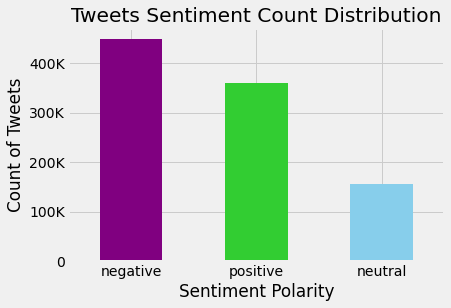

<Figure size 1152x648 with 0 Axes>

In [42]:
# Plot sentiment count distribution
sentiment_count = tweet_sentiments_df['sentiment'].value_counts()
sentiment_count.plot(kind='bar',rot=0,color=['purple','limegreen','skyblue'])
plt.title('Tweets Sentiment Count Distribution')
plt.ylabel('Count of Tweets')
plt.xlabel('Sentiment Polarity')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(edit_tick_values))
plt.figure(figsize=(16,9))
plt.show()

In [43]:
# Save image
# plt.savefig("resources/images/sentiment_distribution.png")

<Figure size 432x288 with 0 Axes>

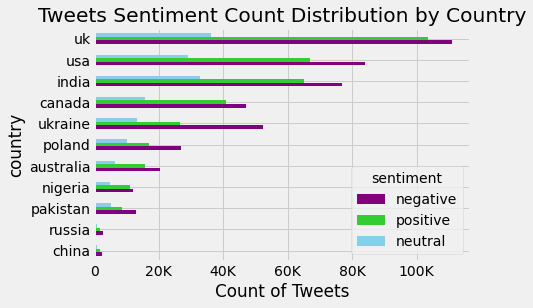

<Figure size 1152x648 with 0 Axes>

In [47]:
# plot sentiment count distribution by country
sentiment_by_country = pd.crosstab(tweet_sentiments_df['country'],tweet_sentiments_df['sentiment'])
sentiment_by_country['total'] = sentiment_by_country['positive'] + sentiment_by_country['negative'] + sentiment_by_country['neutral']
result = sentiment_by_country.sort_values('total').drop(columns='total')
result = result[['negative', 'positive', 'neutral']]
result.plot(kind='barh',rot=0,color=['purple', 'limegreen', 'skyblue'])
plt.title('Tweets Sentiment Count Distribution by Country')
plt.xlabel('Country')
plt.xlabel('Count of Tweets')
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(edit_tick_values))
plt.figure(figsize=(16,9))
plt.show()

In [44]:
result

sentiment,negative,neutral,positive
country,,,
china,2417,932,1910
russia,2615,943,1830
pakistan,12897,5278,8639
nigeria,11892,4856,11198
australia,20360,6559,15845
poland,26931,10280,17126
ukraine,52484,13275,26521
canada,47115,15788,40983
india,76729,32741,65220


In [38]:
# Save image
# plt.savefig("resources/images/sentiment_distribution_by_country.png")

<Figure size 432x288 with 0 Axes>